# Epoch LFP Data
<p>created: Jan 28, 2023 <br>
last modified: Feb 13, 2024 </p>
<p>
Development of script: 1_epoch_lfp.npy <br>
[Notebook used to develop a function to epoch LFP data and save the epoched files to the external drive in .npy format]

</p>

In [29]:
## reload kernel
# %load_ext autoreload
# %autoreload 2

#### Set-up

In [ ]:
# general
import numpy as np
import matplotlib.pyplot as plt
import os

# custom
from neurodsp.utils import create_times
import sys
sys.path.append("../../code")
from utils import load_nix, epoch_neo_segment
from paths import PROJECT_PATH, EXTERNAL_PATH
from info import FS


#### Example test

In [3]:
# pick exmaple nix file
example_nix_file = EXTERNAL_PATH + r"\V1_v4_1024_electrode_resting_state_data\data\L_SNR_250717\LFP\NSP1_array1_LFP.nix"

In [ ]:
example_npy_file = example_nix_file.split('\\data\\')[1].replace("\\",'_')
example_npy_file = example_npy_file.replace(".nix", ".npy")
print(example_npy_file)

L_SNR_250717_LFP_NSP1_array1_LFP.npy


In [6]:
# load data
data_in = load_nix(example_nix_file)

# create time-vector
lfp = data_in[1]
n_seconds = lfp.shape[0]/FS
time = create_times(n_seconds, FS)

(48207, 64)


[Text(0.5, 0, 'Time (s)'), Text(0, 0.5, 'Volateg (uV)')]

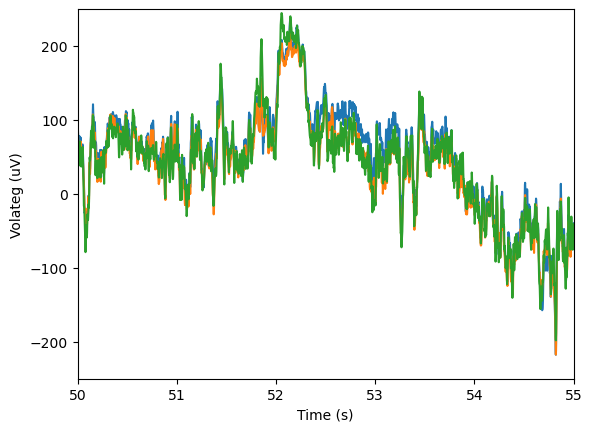

In [26]:
# print data size
print(data_in[1].shape)

# plot example data
fig, ax = plt.subplots()
ax.plot(time, lfp[: , 0:3 ])
ax.set_xlim([50,55])
ax.set_ylim([-250, 250])

ax.set(xlabel= "Time (s)", ylabel= "Volateg (uV)")


#### Epoch Example Data

In [29]:
## epoch data
# epoched_data = epoch_nix(example_nix_file)
# epoched_data.shape

## save to file (external drive)
# np.save(f"{EXTERNAL_PATH}/data/lfp_epochs/{example_npy_file}.npy", epoched_data)

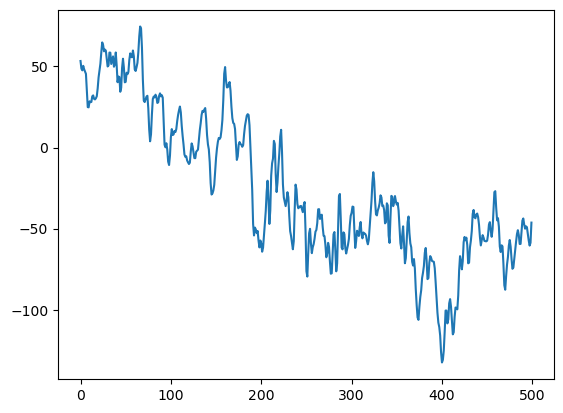

In [28]:
## plot epoched example data
# plt.plot(epoched_data[0,0,:])

#### Create function to epoch (and aggregate) all files

In [39]:
# define function
def epoch_lfps(path_in, path_out):

    # load and epoch data
    files = os.listdir(path_in)
    for file in files :
        print(f"Analyzing: \t{file}")
        lfp = epoch_nix(f"{path_in}/{file}")

        lfp_pre = lfp[:,:,:250]
        lfp_post = lfp[:,:,250:]

        # save data to file
        np.save(f"{path_out}/{file.replace('.nix','.npy')}", lfp)
        np.save(f"{path_out}/{file.replace('.nix','_pre.npy')}", lfp_pre)
        np.save(f"{path_out}/{file.replace('.nix','_post.npy')}", lfp_post)

In [40]:
# run the function
epoch_lfps(r"G:\Shared drives\v1_v4_1024\data\L_SNR_250717", r"G:\Shared drives\v1_v4_1024\data\lfp_epochs\L_SNR_250717")

Analyzing: 	NSP8_array15_LFP.nix
Analyzing: 	NSP8_array16_LFP.nix
Analyzing: 	NSP1_array2_LFP.nix
Analyzing: 	NSP1_array1_LFP.nix
Analyzing: 	NSP2_array3_LFP.nix
Analyzing: 	NSP2_array4_LFP.nix
Analyzing: 	NSP3_array5_LFP.nix
Analyzing: 	NSP3_array6_LFP.nix
Analyzing: 	NSP4_array7_LFP.nix
Analyzing: 	NSP4_array8_LFP.nix
Analyzing: 	NSP5_array9_LFP.nix
Analyzing: 	NSP5_array10_LFP.nix
Analyzing: 	NSP6_array11_LFP.nix
Analyzing: 	NSP6_array12_LFP.nix
Analyzing: 	NSP7_array13_LFP.nix
Analyzing: 	NSP7_array14_LFP.nix
